In [118]:
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

import preprocessing 

In [119]:
url = 'https://www.census.gov/construction/bps/txt/tb3u2015.txt'

In [171]:
# squeeze=True turns into pd.Series, may be able to split on 

txt = pd.read_csv(url, sep=":" ,header=8, skipfooter=2)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [172]:
txt

,CSA CBSA Name Total 1 Unit 2 Units Units or more or more
0,"999 10180 Abilene, TX ..."
1,"184 10420 Akron, OH ..."
2,"999 10500 Albany, GA ..."
3,"440 10540 Albany, OR ..."
4,"104 10580 Albany-Schenectady-Troy, NY ..."
...,...
400,"999 49420 Yakima, WA ..."
401,"276 49620 York-Hanover, PA ..."
402,"566 49660 Youngstown-Warren-Boardman, OH-PA ..."
403,"472 49700 Yuba City, CA ..."


In [121]:
line_re = r'(?P<csa>\d+)\s+(?P<cbsa>\d+)\s+(?P<city>.+),\s+(?P<state>..)\s+(?P<one>\d+)\s+(?P<two>\d+)\s+(?P<three>\d+)\s+(?P<four>\d+)\s+(?P<multifamily_units>\d+)\s+(?P<multifamily_structures>\d+$)'
sentence = '999 10180 Abilene, TX                             535     303       4       0     228      24'

In [157]:
match = re.search(line_re, sentence)

In [158]:
match.groupdict()

{'csa': '999',
 'cbsa': '10180',
 'city': 'Abilene',
 'state': 'TX',
 'one': '535',
 'two': '303',
 'three': '4',
 'four': '0',
 'multifamily_units': '228',
 'multifamily_structures': '24'}

In [170]:
pd.DataFrame.from_dict(re.search(line_re, sentence).groupdict(), index='csa')

TypeError: from_dict() got an unexpected keyword argument 'index'

In [129]:
txt.columns

Index(['CSA CBSA  Name                                   Total 1 Unit 2 Units   Units  or more  or more'], dtype='object')

In [164]:
txt['CSA CBSA  Name                                   Total 1 Unit 2 Units   Units  or more  or more'].apply(lambda x: re.search(line_re, x))                                                   
                                                                                                                                                      

0      <re.Match object; span=(0, 93), match='999 101...
1      <re.Match object; span=(0, 93), match='184 104...
2      <re.Match object; span=(0, 93), match='999 105...
3      <re.Match object; span=(0, 93), match='440 105...
4      <re.Match object; span=(0, 93), match='104 105...
                             ...                        
400    <re.Match object; span=(0, 93), match='999 494...
401    <re.Match object; span=(0, 93), match='276 496...
402                                                 None
403    <re.Match object; span=(0, 93), match='472 497...
404    <re.Match object; span=(0, 93), match='999 497...
Name: CSA CBSA  Name                                   Total 1 Unit 2 Units   Units  or more  or more, Length: 405, dtype: object

In [ ]:
pd.set_option('display.max_colwidth', -1)
string = df.loc[0:2]
string

In [ ]:
pd.read_clipboard()

In [62]:
df = preprocessing.get_model_df()

In [63]:
df = preprocessing.add_new_features(df)

In [64]:
df["city_state"] = df["city"] + "_" + df["state"]

city_mask = df.groupby("city_state").year.count()
city_mask = city_mask[city_mask == 15]
# apply city mask to shrink the df
def in_city_mask(x):
    return x in city_mask
df = df[df.city_state.apply(in_city_mask)]
df = df.sort_values(["city", "state", "year"])

In [65]:
df.head()

,city,state,year,quantity_of_mortgages_pop,total_mortgage_volume_pop,average_mortgage_volume_pop,median_mortgage_amount_pop,quantity_of_mortgages_nc,total_mortgage_volume_nc,average_mortgage_volume_nc,median_mortgage_amount_nc,label,city_state_vol_delta_pop,city_state_vol_delta_nc,city_state_qty_delta_pop,city_state_qty_delta_nc,market_volume,market_volume_delta,ei,city_state
1513,Atlanta,GA,2006,6,33186800,5.531133e+06,4457100.0,2.0,9181100.0,4590550.0,4590550.0,False,NaN,NaN,NaN,NaN,7088073068,NaN,NaN,Atlanta_GA
1815,Atlanta,GA,2007,9,29105800,3.233978e+06,2990200.0,2.0,4541700.0,2270850.0,2270850.0,False,-0.122971,-0.505321,0.500000,0.0,5203386464,-0.265895,1.194693,Atlanta_GA
7673,Atlanta,GA,2008,2,6735000,3.367500e+06,3367500.0,1.0,4950000.0,4950000.0,4950000.0,False,-0.768603,0.089900,-0.777778,-0.5,4593331384,-0.117242,0.262130,Atlanta_GA
773,Atlanta,GA,2009,9,49972900,5.552544e+06,4400000.0,1.0,3750000.0,3750000.0,3750000.0,False,6.419881,-0.242424,3.500000,0.0,8138285946,0.771761,4.187856,Atlanta_GA
469,Atlanta,GA,2010,11,68788385,6.253490e+06,5196100.0,2.0,7203500.0,3601750.0,3601750.0,False,0.376514,0.920933,0.222222,1.0,16444346058,1.020615,0.681235,Atlanta_GA


In [66]:
df["label_quantity_of_mortgages_pop_2y"] = (df.sort_values(["year"])
                                  .groupby(["city", "state"])[["quantity_of_mortgages_pop"]]
                                  .pct_change(2)
                                  .shift(-2))

In [13]:
# df["label_quantity_of_mortgages_pop_2y_delta"] = (df.sort_values(["year"])
#                                   .groupby(["city", "state"])[["label_quantity_of_mortgages_pop_2y"]]
#                                   .pct_change(2)
#                                   .shift(-2))

In [67]:
df["label_total_mortgage_volume_pop_2y"] = (df.sort_values(["year"])
                                  .groupby(["city", "state"])[["total_mortgage_volume_pop"]]
                                  .pct_change(2)
                                  .shift(-2))

In [68]:
df.head()

,city,state,year,quantity_of_mortgages_pop,total_mortgage_volume_pop,average_mortgage_volume_pop,median_mortgage_amount_pop,quantity_of_mortgages_nc,total_mortgage_volume_nc,average_mortgage_volume_nc,...,city_state_vol_delta_pop,city_state_vol_delta_nc,city_state_qty_delta_pop,city_state_qty_delta_nc,market_volume,market_volume_delta,ei,city_state,label_quantity_of_mortgages_pop_2y,label_total_mortgage_volume_pop_2y
1513,Atlanta,GA,2006,6,33186800,5.531133e+06,4457100.0,2.0,9181100.0,4590550.0,...,NaN,NaN,NaN,NaN,7088073068,NaN,NaN,Atlanta_GA,NaN,NaN
1815,Atlanta,GA,2007,9,29105800,3.233978e+06,2990200.0,2.0,4541700.0,2270850.0,...,-0.122971,-0.505321,0.500000,0.0,5203386464,-0.265895,1.194693,Atlanta_GA,NaN,NaN
7673,Atlanta,GA,2008,2,6735000,3.367500e+06,3367500.0,1.0,4950000.0,4950000.0,...,-0.768603,0.089900,-0.777778,-0.5,4593331384,-0.117242,0.262130,Atlanta_GA,0.0,-0.812906
773,Atlanta,GA,2009,9,49972900,5.552544e+06,4400000.0,1.0,3750000.0,3750000.0,...,6.419881,-0.242424,3.500000,0.0,8138285946,0.771761,4.187856,Atlanta_GA,4.5,9.213569
469,Atlanta,GA,2010,11,68788385,6.253490e+06,5196100.0,2.0,7203500.0,3601750.0,...,0.376514,0.920933,0.222222,1.0,16444346058,1.020615,0.681235,Atlanta_GA,4.5,14.076042


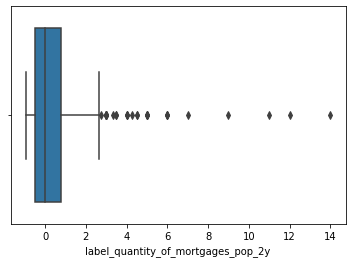

In [71]:
sns.boxplot(df.label_quantity_of_mortgages_pop_2y)

In [96]:
Q3 = df.label_quantity_of_mortgages_pop_2y.quantile(.75)
Q1 = df.label_quantity_of_mortgages_pop_2y.quantile(.25)
upper_fence_quantity = Q3 + ((Q3-Q1)*1.5)
upper_fence_quantity

2.7361111111111116

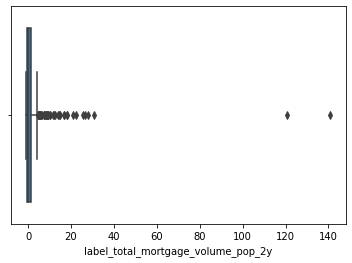

In [86]:
sns.boxplot(df.label_total_mortgage_volume_pop_2y)

In [88]:
Q3 = df.label_total_mortgage_volume_pop_2y.quantile(.75)
Q1 = df.label_total_mortgage_volume_pop_2y.quantile(.25)
upper_fence_volume = Q3 + ((Q3-Q1)*1.5)
upper_fence_volume

4.482890459913195

In [97]:
df['should_enter'] = (df.label_total_mortgage_volume_pop_2y > upper_fence_volume) | (df.label_quantity_of_mortgages_pop_2y > upper_fence_quantity)

In [98]:
df.should_enter.sum()

52

In [ ]:
def labeling_future_data(df):
    """this function takes in a data frame and returns a boolean column that identifies
    if a city_state_year is a market that should be entered"""
    
    df["label_quantity_of_mortgages_pop_2y"] = (df.sort_values(["year"])
                                  .groupby(["city", "state"])[["quantity_of_mortgages_pop"]]
                                  .pct_change(2)
                                  .shift(-2))
    
    df["label_total_mortgage_volume_pop_2y"] = (df.sort_values(["year"])
                                  .groupby(["city", "state"])[["total_mortgage_volume_pop"]]
                                  .pct_change(2)
                                  .shift(-2))
    
    Q3 = df.label_quantity_of_mortgages_pop_2y.quantile(.75)
    Q1 = df.label_quantity_of_mortgages_pop_2y.quantile(.25)
    upper_fence_quantity = Q3 + ((Q3-Q1)*1.5)
    upper_fence_quantity
    
    Q3 = df.label_total_mortgage_volume_pop_2y.quantile(.75)
    Q1 = df.label_total_mortgage_volume_pop_2y.quantile(.25)
    upper_fence_volume = Q3 + ((Q3-Q1)*1.5)
    upper_fence_volume
    
    df['should_enter'] = (df.label_total_mortgage_volume_pop_2y > upper_fence_volume) | (df.label_quantity_of_mortgages_pop_2y > upper_fence_quantity)
    
    return df

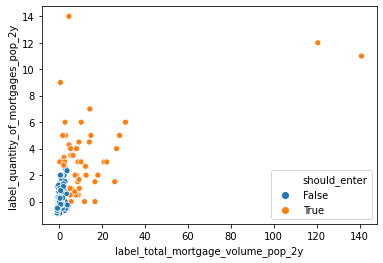

In [104]:
sns.scatterplot(x='label_total_mortgage_volume_pop_2y', y='label_quantity_of_mortgages_pop_2y', data=df, hue='should_enter')

1513    False
1815    False
7673    False
773     False
469     False
        ...  
19      False
131     False
98      False
547     False
156     False
Name: city, Length: 390, dtype: bool

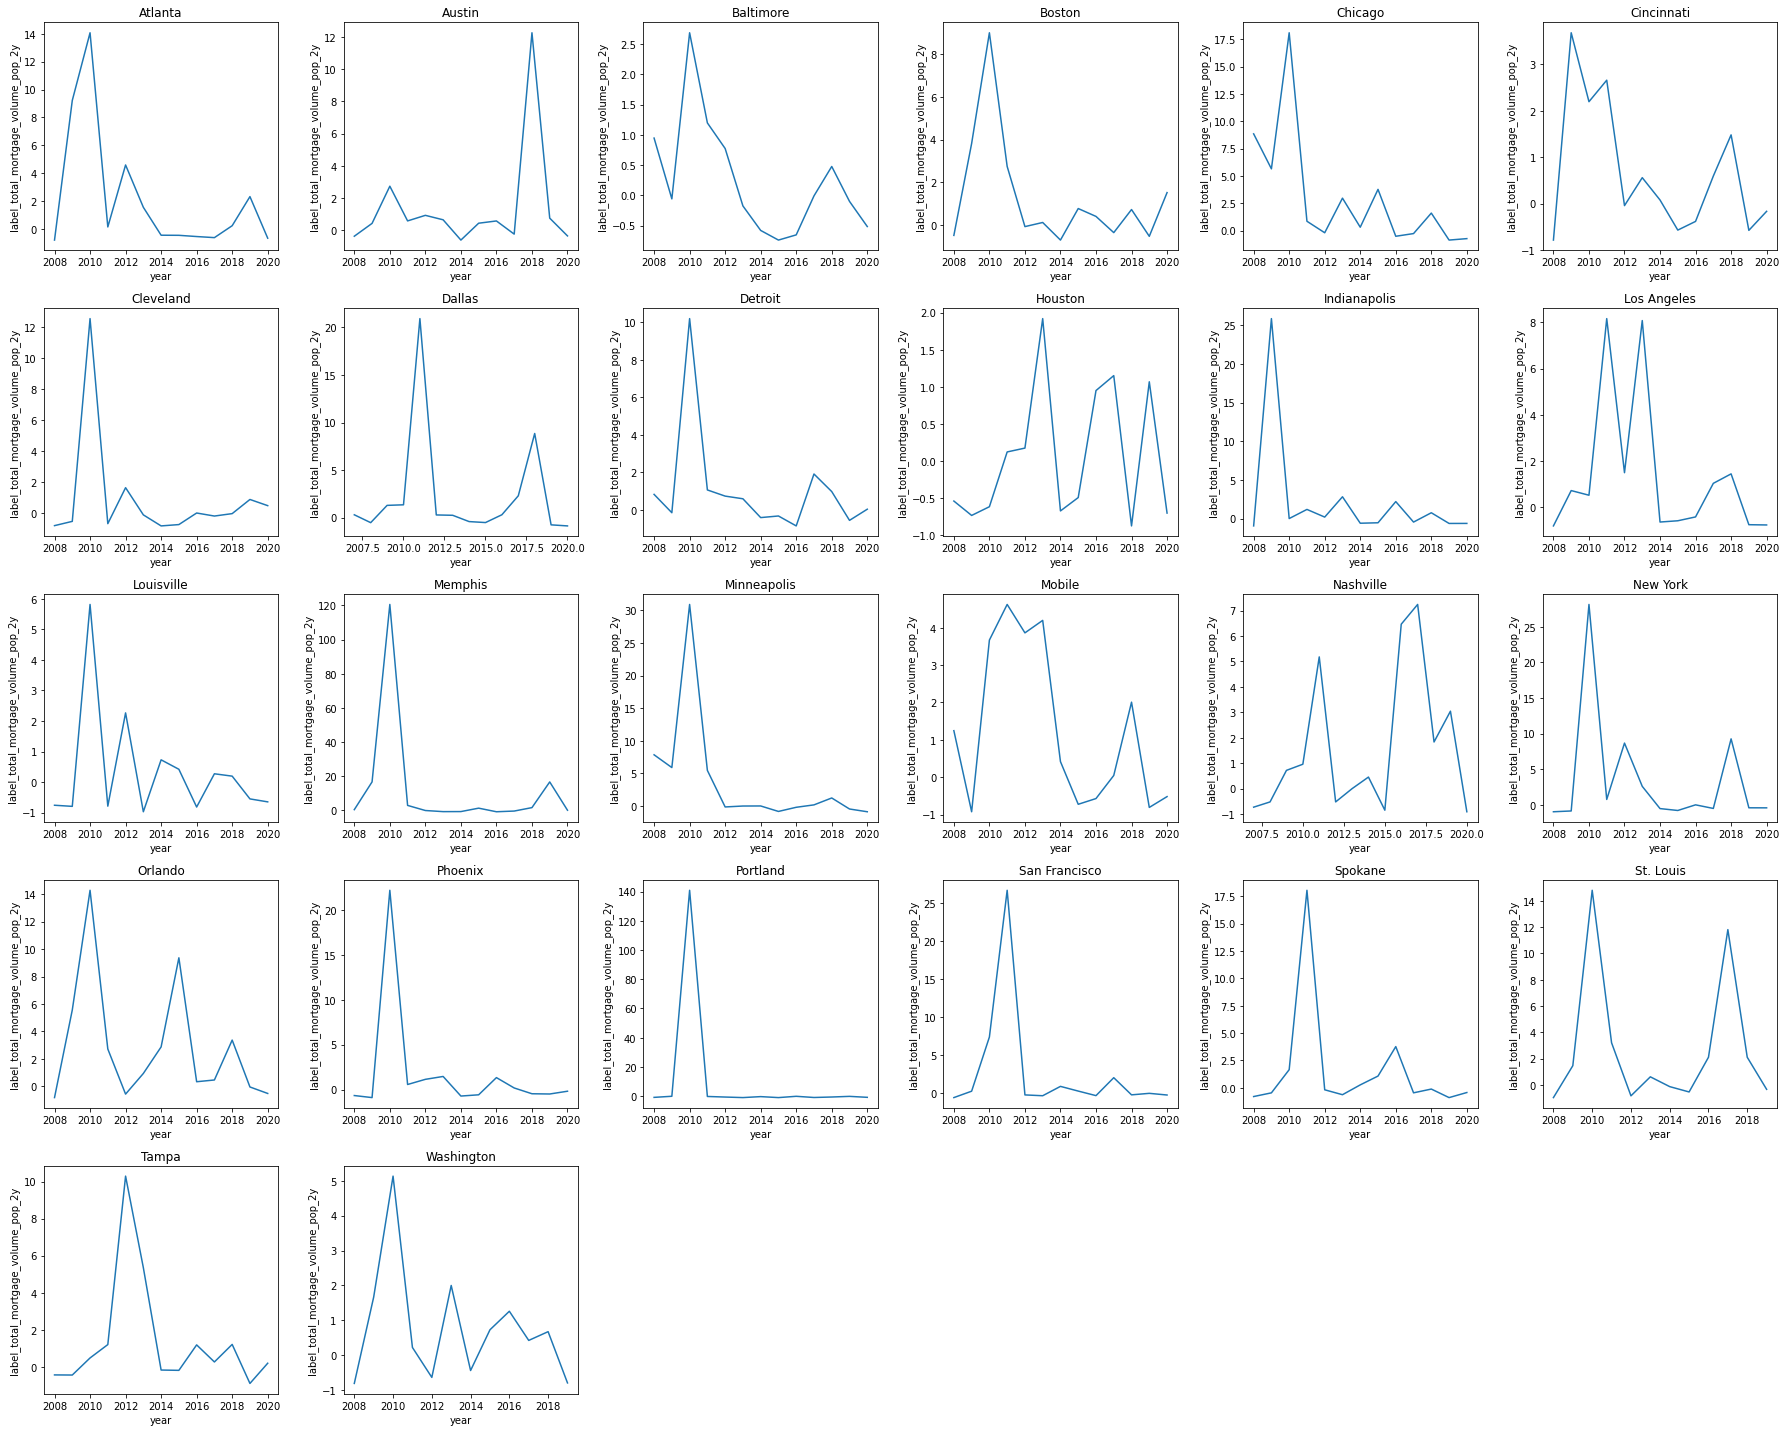

In [89]:
f = plt.figure(figsize=(25,20))
for i in range(0,26):
    f.add_subplot(5,6, i+1)
    sns.lineplot(x='year', y='label_total_mortgage_volume_pop_2y', data=df[df.city==df.city.unique()[i]])
    plt.title(df.city.unique()[i])
plt.tight_layout()

plt.show()

In [33]:
df[df.city=='Atlanta']

,city,state,year,quantity_of_mortgages_pop,total_mortgage_volume_pop,average_mortgage_volume_pop,median_mortgage_amount_pop,quantity_of_mortgages_nc,total_mortgage_volume_nc,average_mortgage_volume_nc,...,city_state_vol_delta_nc,city_state_qty_delta_pop,city_state_qty_delta_nc,market_volume,market_volume_delta,ei,city_state,label_quantity_of_mortgages_pop_2y,label_quantity_of_mortgages_pop_2y_delta,label_total_mortgage_volume_pop_2y
1513,Atlanta,GA,2006,6,33186800,5.531133e+06,4457100.0,2.0,9181100.0,4590550.0,...,NaN,NaN,NaN,7088073068,NaN,NaN,Atlanta_GA,NaN,NaN,NaN
1815,Atlanta,GA,2007,9,29105800,3.233978e+06,2990200.0,2.0,4541700.0,2270850.0,...,-0.505321,0.500000,0.0,5203386464,-0.265895,1.194693,Atlanta_GA,NaN,NaN,NaN
7673,Atlanta,GA,2008,2,6735000,3.367500e+06,3367500.0,1.0,4950000.0,4950000.0,...,0.089900,-0.777778,-0.5,4593331384,-0.117242,0.262130,Atlanta_GA,0.000000,NaN,-0.812906
773,Atlanta,GA,2009,9,49972900,5.552544e+06,4400000.0,1.0,3750000.0,3750000.0,...,-0.242424,3.500000,0.0,8138285946,0.771761,4.187856,Atlanta_GA,4.500000,inf,9.213569
469,Atlanta,GA,2010,11,68788385,6.253490e+06,5196100.0,2.0,7203500.0,3601750.0,...,0.920933,0.222222,1.0,16444346058,1.020615,0.681235,Atlanta_GA,4.500000,-2.500000,14.076042
641,Atlanta,GA,2011,10,56215900,5.621590e+06,4341850.0,2.0,9274500.0,4637250.0,...,0.287499,-0.090909,0.0,17678683423,0.075062,0.760170,Atlanta_GA,0.300000,2.375000,0.130135
635,Atlanta,GA,2012,12,56365900,4.697158e+06,3250100.0,1.0,3000000.0,3000000.0,...,-0.676532,0.200000,-0.5,22203696331,0.255959,0.798329,Atlanta_GA,14.000000,-1.000000,4.581443
128,Atlanta,GA,2013,19,138582800,7.293832e+06,6133600.0,NaN,NaN,NaN,...,0.000000,0.583333,0.0,25474256780,0.147298,2.142973,Atlanta_GA,0.250000,-1.047619,1.541315
215,Atlanta,GA,2014,11,106803300,9.709391e+06,4919700.0,1.0,15861400.0,15861400.0,...,4.287133,-0.421053,0.0,16642823555,-0.346681,1.179641,Atlanta_GA,-0.230769,-1.133333,-0.463824
2843,Atlanta,GA,2015,4,20900000,5.225000e+06,5750000.0,1.0,5500000.0,5500000.0,...,-0.653246,-0.636364,0.0,13777111433,-0.172189,0.236391,Atlanta_GA,0.000000,-1.190476,-0.471190


In [36]:
df.head()

,city,state,year,quantity_of_mortgages_pop,total_mortgage_volume_pop,average_mortgage_volume_pop,median_mortgage_amount_pop,quantity_of_mortgages_nc,total_mortgage_volume_nc,average_mortgage_volume_nc,...,city_state_qty_delta_pop,city_state_qty_delta_nc,market_volume,market_volume_delta,ei,city_state,label_quantity_of_mortgages_pop_2y,label_quantity_of_mortgages_pop_2y_delta,label_total_mortgage_volume_pop_2y,label_observation_year
1513,Atlanta,GA,2006,6,33186800,5.531133e+06,4457100.0,2.0,9181100.0,4590550.0,...,NaN,NaN,7088073068,NaN,NaN,Atlanta_GA,NaN,NaN,NaN,2008.0
1815,Atlanta,GA,2007,9,29105800,3.233978e+06,2990200.0,2.0,4541700.0,2270850.0,...,0.500000,0.0,5203386464,-0.265895,1.194693,Atlanta_GA,NaN,NaN,NaN,2009.0
7673,Atlanta,GA,2008,2,6735000,3.367500e+06,3367500.0,1.0,4950000.0,4950000.0,...,-0.777778,-0.5,4593331384,-0.117242,0.262130,Atlanta_GA,0.0,NaN,-0.812906,2010.0
773,Atlanta,GA,2009,9,49972900,5.552544e+06,4400000.0,1.0,3750000.0,3750000.0,...,3.500000,0.0,8138285946,0.771761,4.187856,Atlanta_GA,4.5,inf,9.213569,2011.0
469,Atlanta,GA,2010,11,68788385,6.253490e+06,5196100.0,2.0,7203500.0,3601750.0,...,0.222222,1.0,16444346058,1.020615,0.681235,Atlanta_GA,4.5,-2.5,14.076042,2012.0


In [39]:
sample = pd.DataFrame([x for x in range(0,100)])

In [50]:
sample['test_column'] = sample[0]*2

In [53]:
sample['off_one'] = sample.test_column.pct_change(1)
sample['off_two'] = sample.test_column.pct_change(2)
sample['off_three'] = sample.test_column.pct_change(3)
sample['off_four'] = sample.test_column.pct_change(4)

In [57]:
sample['off_one_shift'] = sample.test_column.pct_change(1).shift(-1)
sample['off_two_shift'] = sample.test_column.pct_change(2).shift(-2)
sample['off_three_shift'] = sample.test_column.pct_change(3).shift(-3)
sample['off_four_shift'] = sample.test_column.pct_change(4).shift(-4)

In [58]:
sample.head(30)

,0,test_column,off_one,off_two,off_three,off_four,off_one_shift,off_two_shift,off_three_shift,off_four_shift
0,0,0,NaN,NaN,NaN,NaN,inf,inf,inf,inf
1,1,2,inf,NaN,NaN,NaN,1.000000,2.000000,3.000000,4.000000
2,2,4,1.000000,inf,NaN,NaN,0.500000,1.000000,1.500000,2.000000
3,3,6,0.500000,2.000000,inf,NaN,0.333333,0.666667,1.000000,1.333333
4,4,8,0.333333,1.000000,3.000000,inf,0.250000,0.500000,0.750000,1.000000
5,5,10,0.250000,0.666667,1.500000,4.000000,0.200000,0.400000,0.600000,0.800000
6,6,12,0.200000,0.500000,1.000000,2.000000,0.166667,0.333333,0.500000,0.666667
7,7,14,0.166667,0.400000,0.750000,1.333333,0.142857,0.285714,0.428571,0.571429
8,8,16,0.142857,0.333333,0.600000,1.000000,0.125000,0.250000,0.375000,0.500000
9,9,18,0.125000,0.285714,0.500000,0.800000,0.111111,0.222222,0.333333,0.444444


In [ ]:
(?P<csa>)\s(?P<cbsa>.+)\s(?P<city>.+),\s+(?<state>..)\s+(?P<units_1>\d+)\s+(?<units_2>\d+)\s+(?P<units_3>\d+)\s+(?P<units_4>\d+)\s+(?P<units_5>\d+)\s+(?P<structure_5>\d+)